# Light travel time delay

A simple example showing the effects of light travel time delay on an edge-on planet in an orbit similar to that of Earth.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import starry
from astropy import units as u
starry.config.lazy = True

In [3]:
star = starry.Primary(starry.Map(udeg=2, L=1.0), m=1.0, r=1.0)
star.map[1:] = [0.5, 0.25]
planet = starry.Secondary(starry.Map(1, L=0.0025), porb=365.25, r=0.1, prot=365.25, m=0.0, t0=0.0)
planet.map[1, 0] = 0.5

In [4]:
sys1 = starry.System(star, planet, light_delay=False)
sys2 = starry.System(star, planet, light_delay=True)

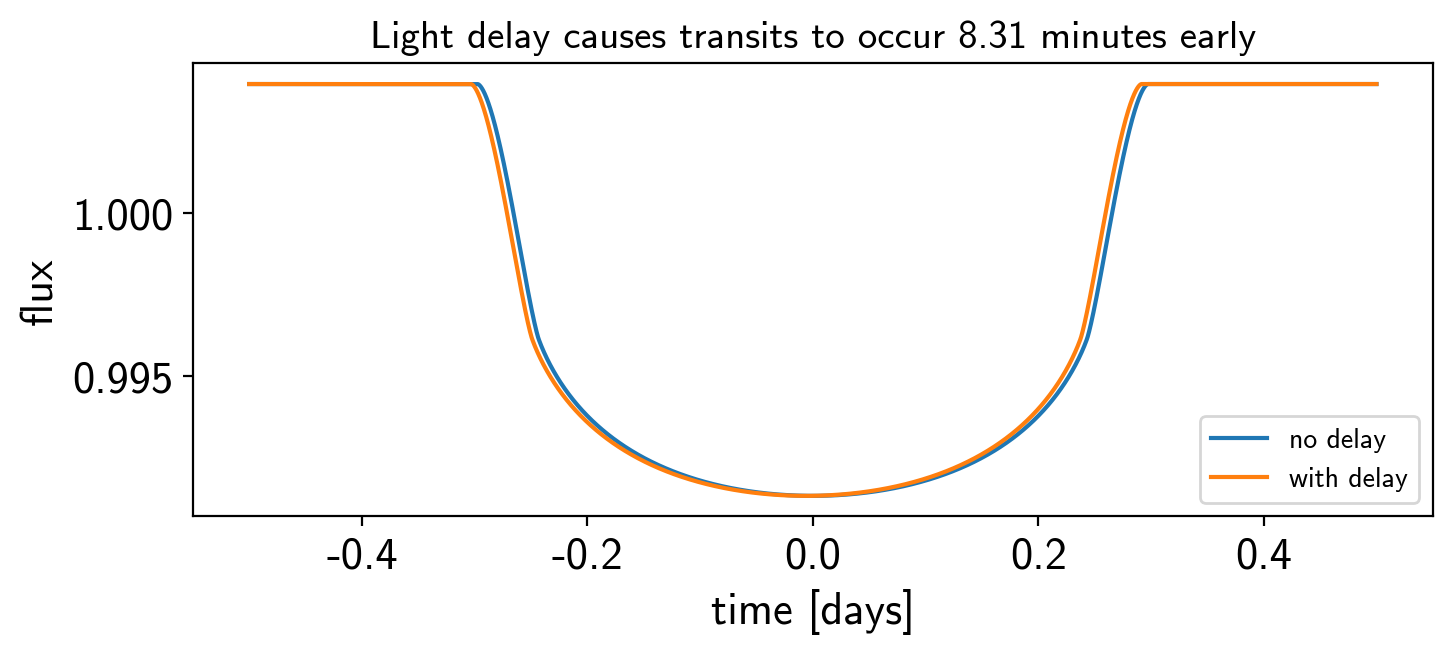

In [11]:
# Compute the delay in the zero-crossing
t = np.linspace(-0.01, 0.01, 999)
t1 = t[np.argmin(np.abs(sys1.position(t)[0][1].eval()))]
t2 = t[np.argmin(np.abs(sys2.position(t)[0][1].eval()))]
diff = (t1 - t2) * u.day.to(u.minute)

# Plot the transits
t = np.linspace(-0.5, 0.5, 20000)
fig = plt.figure(figsize=(8, 3))
plt.plot(t, sys1.flux(t).eval(), label="no delay")
plt.plot(t, sys2.flux(t).eval(), label="with delay")
plt.xlabel("time [days]")
plt.ylabel("flux")
plt.legend(fontsize=10, loc="lower right")
plt.title("Light delay causes transits to occur %.2f minutes early" % diff, fontsize=14);

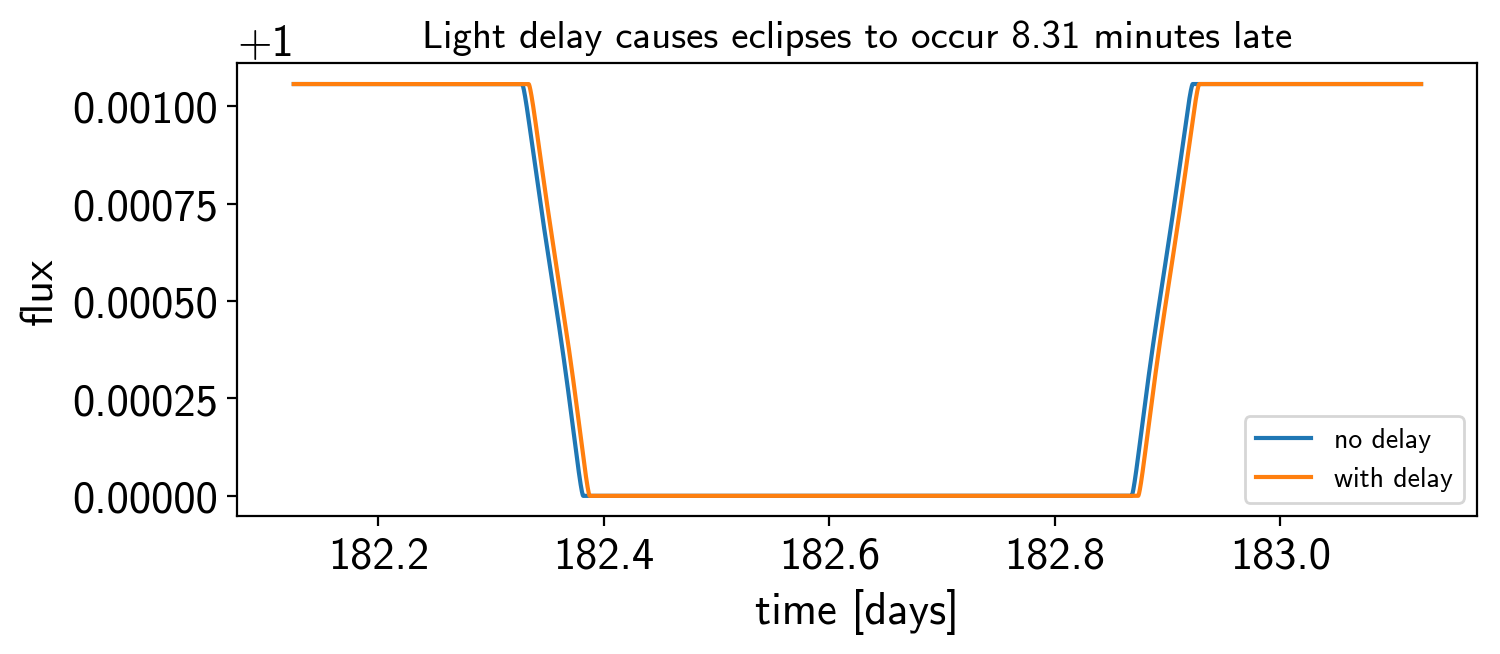

In [13]:
# Compute the delay in the zero-crossing
t = np.linspace(planet.porb.eval() / 2 - 0.01, planet.porb.eval() / 2 + 0.01, 999)
t1 = t[np.argmin(np.abs(sys1.position(t)[0][1].eval()))]
t2 = t[np.argmin(np.abs(sys2.position(t)[0][1].eval()))]
diff = (t2 - t1) * u.day.to(u.minute)

t = np.linspace(planet.porb.eval() / 2 - 0.5, planet.porb.eval() / 2 + 0.5, 20000)
fig = plt.figure(figsize=(8, 3))
plt.plot(t, sys1.flux(t).eval(), label="no delay")
plt.plot(t, sys2.flux(t).eval(), label="with delay")
plt.xlabel("time [days]")
plt.ylabel("flux")
plt.legend(fontsize=10, loc="lower right")
plt.title("Light delay causes eclipses to occur %.2f minutes late" % diff, fontsize=14);